In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import healpy as hp

In [18]:
d2r = np.pi / 180.
lonc = 107.2
latc = 5.2
lonra = [lonc-1.5, lonc+1.5]
latra = [latc-1.5, latc+1.5]

In [50]:
z = hp.read_map('../externaldata/DIRBE_ZSMA_6_256.fits')

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING


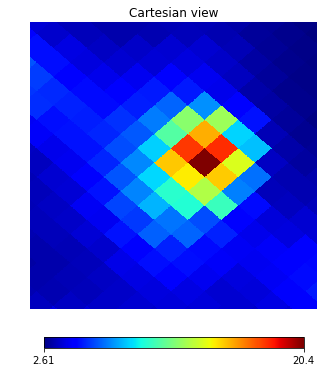

In [51]:
hp.cartview(z, lonra=lonra, latra=latra)

In [54]:
z = hp.read_map('../externaldata/DIRBE_ZSMA_6_256.fits')
z = hp.smoothing(hp.ud_grade(z, 512), fwhm=1.*np.pi/180., verbose=False)

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


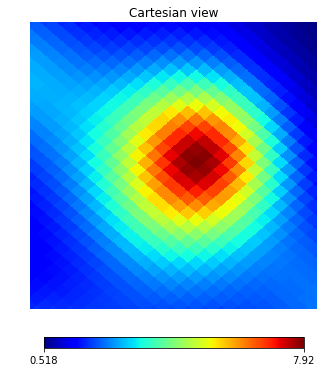

In [55]:
hp.cartview(z, lonra=lonra, latra=latra)

In [95]:
3.e8 / 240 * 1e6 * 1e-12

1.25

In [106]:
np.sqrt(1.323e-4 ) /d2r * 60

39.541560520338514

In [107]:
dirbefiles = ['../externaldata/DIRBE_ZSMA_1_256.fits', \
              '../externaldata/DIRBE_ZSMA_2_256.fits', \
              '../externaldata/DIRBE_ZSMA_3_256.fits', \
              '../externaldata/DIRBE_ZSMA_4_256.fits', \
              '../externaldata/DIRBE_ZSMA_5_256.fits', \
              '../externaldata/DIRBE_ZSMA_6_256.fits', \
              '../externaldata/DIRBE_ZSMA_7_256.fits', \
              '../externaldata/DIRBE_ZSMA_8_256.fits', \
              '../externaldata/DIRBE_ZSMA_9_256.fits', \
              '../externaldata/DIRBE_ZSMA_10_256.fits']
dirbefreqs = np.array([240, 136.36, 85.71, 61.22, 25, 12, 5, 3, 2.1428, 1.25]) * 1.e12
dirbebeams = np.array([37.6, 41.0, 39.0, 41.5, 41.0, 41.5, 42.3, 41.0, 40.4, 39.5])

In [82]:
def dirbe_flux(dirbe, beam=40., inside=60., outside=90., radius=60.):
    z = hp.read_map(dirbe)
    newbeam = np.sqrt(60.**2 - beam**2) / 60.
    z = hp.ud_grade(hp.smoothing(z, fwhm=newbeam*np.pi/180., verbose=False), 512)
    
    nside = hp.get_nside(z)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, (radius/60.)*d2r, inclusive=False)
    amaskout = set(hp.query_disc(nside, vecc, (outside/60.)*d2r, inclusive=False))
    amaskin = set(hp.query_disc(nside, vecc, (inside/60.)*d2r, inclusive=False))
    amask = np.array(list(amaskout.difference(amaskin)))
    
    y = z * hp.nside2pixarea(nside) * 1.e6
    
    rdata = y[rmask]
    adata = y[amask]
    flux = np.sum(rdata - np.median(adata))
    rms = np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))
    print flux, rms

In [74]:
dirbe_flux('../externaldata/DIRBE_ZSMA_10_256.fits', beam=37.1, inside=80, outside=100)

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
45949.4700719 1498.6500982


In [79]:
dirbe_flux('../externaldata/DIRBE_ZSMA_9_256.fits', beam=38., inside=80, outside=100)

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
78763.9367632 1936.31342625


In [76]:
dirbe_flux('../externaldata/DIRBE_ZSMA_8_256.fits', beam=37.1, inside=80, outside=100)

NSIDE = 256
ORDERING = NESTED in fits file
Ordering converted to RING
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
48121.5925998 1031.38710915
